# Домашнее задание №2


Перед вами датасет с данными о вреде курения


Структура данных:

1. **gender**: Пол пациента
2. **age**: Возраст пациента
3. **hypertension**: Наличие гипертонии у пациента 1 - есть, 0 - не наблюдалось
4. **heart_disease**: Наличие у пациента болезней связанных с сердцем 1 - есть, 0 - здоров
5. **ever_married**: Брак - (Состоял в браке/ холост)
6. **work_type**: Работ - Ребенок(children), Госслужащий(Govt_jov), Никогда не работал(Never_worked), Самозанятый(self-employed) или Скрыто(private)
7. **Residence_type**: место работы городская среда(Urban)/удаленка или за городом(Rural)
8. **avg_glucose_level**: средний уровень глюкозы в крови
9. **bmi**: индекс массы тела
10. **smoking_status**: Пациент курит(Иногда, всегда, время от времени или Unknown - неизвестно)
11. **stroke**: Перенесенный инсульт (1 - пациент перенес инсульт, 0 - инсульта не было) - *ваш target*

## Ваша задача

№1 Восстановить целостностью данных, реализовать функцию позволяющие выполнять заполнение данных по среднему или по медианному значению в Series. 

1.  Заполнить пропуски
2.  Убрать дубликаты
3.  Убрать некорректные данные и.т.п.


№2 Построить baseline-модель, попытаться выбить лучший скор (сравнить несколько моделей)

№3 Сделать визуализацию для мини-исследования о вреде курения с разбивкой по половой принадлежности пациентов с помощью pandas, matplotlib, seaborn, plotly и других инструментов.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier



In [2]:
url = 'https://drive.google.com/file/d/1He5GI5_Gd8uXYfeETLBISQ5BszX0o4pU/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
data = pd.read_csv(url,names=['index','gender', 'age', 'hypertension', 'heart_disease',
       'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level',
       'bmi', 'smoking_status', 'stroke'])
data = data.drop('index',axis=1)

In [3]:
data.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,Male,67.0,0.0,1.0,Yes,Private,Urban,228.69,NaN,formerly smoked,1
3,Female,61.0,0.0,0.0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
4,Male,80.0,0.0,1.0,Yes,Private,NaN,105.92,32.5,never smoked,1
5,Female,49.0,0.0,0.0,Yes,Private,Urban,171.23,34.4,smokes,1
6,Female,79.0,1.0,0.0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
7,Male,81.0,0.0,0.0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
8,Male,74.0,1.0,1.0,Yes,NaN,Rural,70.09,NaN,never smoked,1
9,Female,69.0,0.0,NaN,No,Private,Urban,94.39,22.8,never smoked,1


In [4]:
data = data.drop_duplicates()

In [5]:
data = data.drop(index=[0])

In [6]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,Male,67.0,0.0,1.0,Yes,Private,Urban,228.69,NaN,formerly smoked,1
3,Female,61.0,0.0,0.0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
4,Male,80.0,0.0,1.0,Yes,Private,NaN,105.92,32.5,never smoked,1
5,Female,49.0,0.0,0.0,Yes,Private,Urban,171.23,34.4,smokes,1
6,Female,79.0,1.0,0.0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
data = data.reset_index(drop=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5106 entries, 0 to 5105
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gender             5106 non-null   object
 1   age                4963 non-null   object
 2   hypertension       4903 non-null   object
 3   heart_disease      4282 non-null   object
 4   ever_married       5106 non-null   object
 5   work_type          4773 non-null   object
 6   Residence_type     4302 non-null   object
 7   avg_glucose_level  4622 non-null   object
 8   bmi                4167 non-null   object
 9   smoking_status     5106 non-null   object
 10  stroke             5106 non-null   object
dtypes: object(11)
memory usage: 438.9+ KB


In [9]:
bad_series = data[['gender','hypertension','ever_married','work_type','Residence_type','smoking_status']]
encoder = OrdinalEncoder()
df = pd.DataFrame(encoder.fit_transform(bad_series), columns=bad_series.columns)

In [10]:
df

,gender,hypertension,ever_married,work_type,Residence_type,smoking_status
0,1.0,0.0,1.0,2.0,1.0,1.0
1,0.0,0.0,1.0,3.0,0.0,2.0
2,1.0,0.0,1.0,2.0,NaN,2.0
3,0.0,0.0,1.0,2.0,1.0,3.0
4,0.0,1.0,1.0,3.0,0.0,2.0
...,...,...,...,...,...,...
5101,0.0,1.0,1.0,2.0,1.0,2.0
5102,0.0,0.0,1.0,3.0,1.0,2.0
5103,0.0,0.0,1.0,3.0,0.0,2.0
5104,1.0,0.0,1.0,2.0,0.0,1.0


In [ ]:
df.columns
col_lst = ['gender', 'hypertension', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status']

for i in col_lst:
  data[i] = df[i]

In [12]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,67.0,0.0,1.0,1.0,2.0,1.0,228.69,NaN,1.0,1
1,0.0,61.0,0.0,0.0,1.0,3.0,0.0,202.21,NaN,2.0,1
2,1.0,80.0,0.0,1.0,1.0,2.0,NaN,105.92,32.5,2.0,1
3,0.0,49.0,0.0,0.0,1.0,2.0,1.0,171.23,34.4,3.0,1
4,0.0,79.0,1.0,0.0,1.0,3.0,0.0,174.12,24.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...
5101,0.0,80.0,1.0,0.0,1.0,2.0,1.0,83.75,NaN,2.0,0
5102,0.0,81.0,0.0,0.0,1.0,3.0,1.0,125.2,40.0,2.0,0
5103,0.0,35.0,0.0,0.0,1.0,3.0,0.0,82.99,30.6,2.0,0
5104,1.0,51.0,0.0,0.0,1.0,2.0,0.0,166.29,25.6,1.0,0


In [13]:
data.info

<bound method DataFrame.info of       gender   age  hypertension heart_disease  ever_married  work_type  \
0        1.0  67.0           0.0           1.0           1.0        2.0   
1        0.0  61.0           0.0           0.0           1.0        3.0   
2        1.0  80.0           0.0           1.0           1.0        2.0   
3        0.0  49.0           0.0           0.0           1.0        2.0   
4        0.0  79.0           1.0           0.0           1.0        3.0   
...      ...   ...           ...           ...           ...        ...   
5101     0.0  80.0           1.0           0.0           1.0        2.0   
5102     0.0  81.0           0.0           0.0           1.0        3.0   
5103     0.0  35.0           0.0           0.0           1.0        3.0   
5104     1.0  51.0           0.0           0.0           1.0        2.0   
5105     0.0  44.0           0.0           0.0           1.0        0.0   

      Residence_type avg_glucose_level   bmi  smoking_status stroke

In [14]:
data = data.astype(np.float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [41]:
columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke']

In [42]:
def my_fill(data,columns):
  for i in cols:
    mean = data[i].mean()
    data[i] = data[i].fillna(value=round(mean))
  return data

In [43]:
data = my_fill(data,columns)

In [45]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,67.0,0.0,1.0,1.0,2.0,1.0,228.69,29.0,1.0,1.0
1,0.0,61.0,0.0,0.0,1.0,3.0,0.0,202.21,29.0,2.0,1.0
2,1.0,80.0,0.0,1.0,1.0,2.0,1.0,105.92,32.5,2.0,1.0
3,0.0,49.0,0.0,0.0,1.0,2.0,1.0,171.23,34.4,3.0,1.0
4,0.0,79.0,1.0,0.0,1.0,3.0,0.0,174.12,24.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5101,0.0,80.0,1.0,0.0,1.0,2.0,1.0,83.75,29.0,2.0,0.0
5102,0.0,81.0,0.0,0.0,1.0,3.0,1.0,125.20,40.0,2.0,0.0
5103,0.0,35.0,0.0,0.0,1.0,3.0,0.0,82.99,30.6,2.0,0.0
5104,1.0,51.0,0.0,0.0,1.0,2.0,0.0,166.29,25.6,1.0,0.0


In [46]:
target = data['stroke']

In [47]:
df = data.drop(labels=['stroke'],axis=1)

In [48]:
SGDC_clf = SGDClassifier()


In [49]:
SGDC_clf.fit(df,target)

SGDClassifier()

In [50]:
SGDC_preds = SGDC_clf.predict(df)
accuracy = accuracy_score(target, SGDC_preds)
print('Значение accuracy = {}'.format(accuracy))

Значение accuracy = 0.9471210340775558


In [51]:
target.mean()

0.04876615746180964

In [52]:
from collections import Counter
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=0)
X_resampled, y_resampled = smote_tomek.fit_resample(df, target)
print(sorted(Counter(y_resampled).items()))

[(0.0, 4819), (1.0, 4819)]


In [53]:
for i in X_resampled.columns:
  X_resampled[f'{i}'] = round(X_resampled[f'{i}'])

In [54]:
SGDC_clf.fit(df,target)
SGDC_preds = SGDC_clf.predict(df)
accuracy = accuracy_score(target, SGDC_preds)
print('Значение accuracy = {}'.format(accuracy))

Значение accuracy = 0.9512338425381903


In [56]:
X,y = X_resampled, y_resampled

In [57]:
# Посмотрим на распределения 
X.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

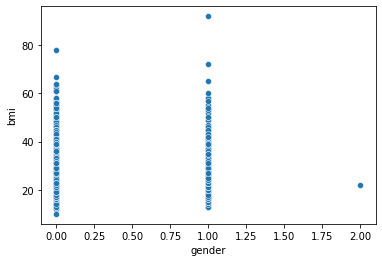

In [58]:
sns.scatterplot(data=X, x="gender", y="bmi")

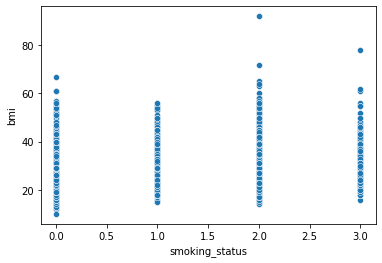

In [59]:
sns.scatterplot(data=X, x="smoking_status", y="bmi") # Тут мы видим что люди имеющие больший Индекс массы тела - курят больше

In [60]:
# Средний уровень глюкозы

In [61]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.0,67.0,0.0,1.0,1.0,2.0,1.0,229.0,29.0,1.0
1,0.0,61.0,0.0,0.0,1.0,3.0,0.0,202.0,29.0,2.0
2,1.0,80.0,0.0,1.0,1.0,2.0,1.0,106.0,32.0,2.0
3,0.0,49.0,0.0,0.0,1.0,2.0,1.0,171.0,34.0,3.0
4,0.0,79.0,1.0,0.0,1.0,3.0,0.0,174.0,24.0,2.0
...,...,...,...,...,...,...,...,...,...,...
9633,0.0,77.0,0.0,0.0,0.0,2.0,1.0,81.0,29.0,0.0
9634,1.0,80.0,1.0,0.0,1.0,2.0,1.0,106.0,32.0,1.0
9635,1.0,53.0,0.0,0.0,1.0,2.0,1.0,72.0,27.0,2.0
9636,1.0,72.0,1.0,0.0,1.0,3.0,1.0,195.0,31.0,2.0


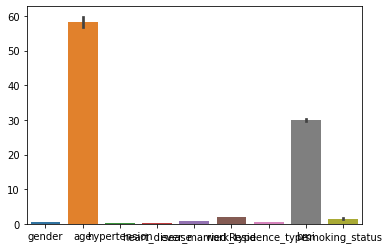

In [62]:
sns.barplot(data = X.groupby('avg_glucose_level').agg(np.mean))

### Отскалируем наши признаки и попробуем обучить снова

In [63]:
scalar = StandardScaler()

In [64]:
scalar.fit(X)
X = pd.DataFrame(scalar.transform(X))

In [65]:
X

,0,1,2,3,4,5,6,7,8,9
0,1.142691,0.564405,-0.448827,3.146858,0.549138,-0.070195,0.832261,2.151128,-0.046529,-0.450019
1,-0.874389,0.290146,-0.448827,-0.317777,0.549138,1.008814,-1.201546,1.633169,-0.046529,0.572684
2,1.142691,1.158631,-0.448827,3.146858,0.549138,-0.070195,0.832261,-0.208465,0.464041,0.572684
3,-0.874389,-0.258370,-0.448827,-0.317777,0.549138,-0.070195,0.832261,1.038475,0.804421,1.595387
4,-0.874389,1.112921,2.228028,-0.317777,0.549138,1.008814,-1.201546,1.096026,-0.897479,0.572684
...,...,...,...,...,...,...,...,...,...,...
9633,-0.874389,1.021502,-0.448827,-0.317777,-1.821034,-0.070195,0.832261,-0.688057,-0.046529,-1.472722
9634,1.142691,1.158631,2.228028,-0.317777,0.549138,-0.070195,0.832261,-0.208465,0.464041,-0.450019
9635,1.142691,-0.075532,-0.448827,-0.317777,0.549138,-0.070195,0.832261,-0.860710,-0.386909,0.572684
9636,1.142691,0.792953,2.228028,-0.317777,0.549138,1.008814,0.832261,1.498883,0.293851,0.572684


In [66]:
#Возьмем более комплексную метрику f1

In [67]:
train, test, target_train, target_test = train_test_split(X, y, test_size=0.2, random_state=44)
clf = RandomForestClassifier()
#ту мач model_params = {"criterion":["gini", "entropy","log_loss"],'max_depth':[i+1 for i in range(7)],'min_impurity_decrease':[0.0,0.1,0.2,0.5,1],"n_estimators":[100, 200,300,500]}
model_params = {"criterion":["gini", "entropy"],'max_depth':[10,20,30],'min_impurity_decrease':[0.1,0.5,1],"n_estimators":[100, 200,500]}
grid_clf = GridSearchCV(clf, model_params)
grid_clf.fit(train, target_train)
pred_grid = grid_clf.predict(test)
f_1_grid = f1_score(target_test, pred_grid)
print(f_1_grid)

0.7909441233140655


Сейчас метрика выглядит достаточно реально, потому что при подборе оптимальных параметров мы отскалировали признаки и попробовали несколько моделей случайного леса. 